In [13]:
import pandas as pd

df = pd.read_csv('data/color_names.csv')
df['red'] = df['Red (8 bit)']
df['green'] = df['Green (8 bit)']
df['blue'] = df['Blue (8 bit)']
df['name'] = df['Name']
df = df[['name','red', 'green', 'blue']]
df

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
1293,Yellow rose,255,240,0
1294,Yellow Sunshine,255,247,0
1295,Zaffre,0,20,168
1296,Zinnwaldite brown,44,22,8


In [55]:
import pandas as pd 

df_color_1 = pd.read_csv('data/color_names.csv')
df_color_1['red'] = df_color_1['Red (8 bit)']
df_color_1['green'] = df_color_1['Green (8 bit)']
df_color_1['blue'] = df_color_1['Blue (8 bit)']
df_color_1['name'] = df_color_1['Name']
df_color_1 = df_color_1[['name','red', 'green', 'blue']]
df_color_1

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
1293,Yellow rose,255,240,0
1294,Yellow Sunshine,255,247,0
1295,Zaffre,0,20,168
1296,Zinnwaldite brown,44,22,8


In [74]:
import pandas as pd 

df_color_2 = pd.read_csv('data/colors.csv')
df_color_2
#filter colors in df_color_2 that are not in df_color_1
df_color_2 = df_color_2[~df_color_2['Name'].isin(df_color_1['name'])]
#transform percentage to 8 bit
#remove the % sign and convert to int

df_color_2['Red'] = df_color_2['Red'].str.replace('%', '').astype(float) /100 
df_color_2['red'] = (round(df_color_2['Red'] * 255)).astype(int)
df_color_2['Green'] = df_color_2['Green'].str.replace('%', '').astype(float) /100
df_color_2['green'] = (round(df_color_2['Green'] * 255)).astype(int)
df_color_2['Blue'] = df_color_2['Blue'].str.replace('%', '').astype(float) /100
df_color_2['blue'] = (round(df_color_2['Blue'] * 255)).astype(int)
df_color_2['name'] = df_color_2['Name']
df_color_2 = df_color_2[['name','red', 'green', 'blue']]
df_color_2

#concatenate the two dataframes
df_color = pd.concat([df_color_1, df_color_2])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
871,Xanthous,242,181,46
881,Yellow-green (Crayola),196,227,133
882,Yellow-green (Color Wheel),48,178,26
884,Yellow Orange (Color Wheel),255,148,5


In [82]:
import pandas as pd

df_color_3 = pd.read_csv('data/colors-1.csv', header=None)
#rename columns
df_color_3.columns = ['na_me','name','hex', 'red', 'green', 'blue']
#remove () from name
df_color_3['name'] = df_color_3['name'].str.replace('(', '')
df_color_3['name'] = df_color_3['name'].str.replace(')', '')
#check how many colors are not in df_color
df_color_3 = df_color_3[~df_color_3['name'].isin(df_color['name'])]
df_color_3 = df_color_3[['name','red', 'green', 'blue']]
df_color_3
#concatenate the three dataframes
df_color = pd.concat([df_color, df_color_3])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
858,Yellow Munsell,239,204,0
859,Yellow Ncs,255,211,0
861,Yellow Process,255,239,0
862,Yellow Ryb,254,254,51


In [114]:
def hex_to_int(s):
    s = s.lstrip("#")
    return int(s[:2], 16), int(s[2:4], 16), int(s[4:6], 16)

In [136]:
import json

color_data = json.loads(open("data/xkcd.json").read())
df_color_4 = pd.DataFrame(color_data['colors'])
# add column red with the value first from hex_to_int function using hex column
df_color_4['red'] = df_color_4['hex'].apply(lambda x: hex_to_int(x)[0])
df_color_4['green'] = df_color_4['hex'].apply(lambda x: hex_to_int(x)[1])
df_color_4['blue'] = df_color_4['hex'].apply(lambda x: hex_to_int(x)[2])
df_color_4['name'] = df_color_4['color']
df_color_4 = df_color_4[['name','red', 'green', 'blue']]
# order by name
df_color_4 = df_color_4.sort_values(by='name')
#capitalize first letter of name exampel "acid green" to "Acid Green"
df_color_4['name'] = df_color_4['name'].str.title()
# check how many colors are not in df_color
df_color_4 = df_color_4[~df_color_4['name'].isin(df_color['name'])]
#check how many colors are in df_color
#df_color_4 = df_color_4[df_color_4['name'].isin(df_color['name'])]
#print(df_color_4[df_color_4['name'] == 'Amber'], df_color_4[df_color_4['name'] == 'Amber'])
print(hex_to_int('#acc2d9'))
df_color_4
#concantenate df
df_color = pd.concat([df_color, df_color_4])
df_color


(172, 194, 217)


,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
813,Yellowish Green,176,221,22
361,Yellowish Orange,255,171,15
10,Yellowish Tan,252,252,129
258,Yellowy Brown,174,139,12


In [186]:
import json
df_color_5 = json.loads(open("data/color_names.json").read())
#first value is hex and second is name
df_color_5 = pd.DataFrame(df_color_5.items(), columns=['hex', 'name'])
df_color_5['red'] = df_color_5['hex'].apply(lambda x: hex_to_int(x)[0])
df_color_5['green'] = df_color_5['hex'].apply(lambda x: hex_to_int(x)[1])
df_color_5['blue'] = df_color_5['hex'].apply(lambda x: hex_to_int(x)[2])
df_color_5 = df_color_5[['name','red', 'green', 'blue']]
#check how many colors are not in df_color
df_color_5 = df_color_5[~df_color_5['name'].isin(df_color['name'])]
#concatenate the five dataframes
df_color = pd.concat([df_color, df_color_5])
df_color

,name,red,green,blue
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
2325,Zircon,244,248,255
2326,Zombie,228,214,155
2328,Zorba,165,155,145
2329,Zuccini,4,64,34


In [187]:
df = df_color

                name  red  green  blue
517  Harlequin green   70    203    24


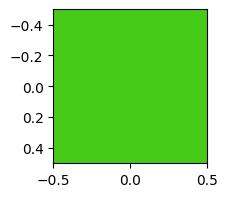

In [188]:
def draw_color(rgb):
    data = [[rgb]]
    data = np.array(data)
    plt.figure(figsize=(2,2))
    data = data.reshape(1,1,3)
    plt.imshow(data, interpolation='nearest')
    plt.show()

random_color = df.sample()
print(random_color)
#get random color index as int
index = random_color.index[0]
draw_color(df.iloc[index][1:4].astype(int).values)


In [189]:
names = df['name']

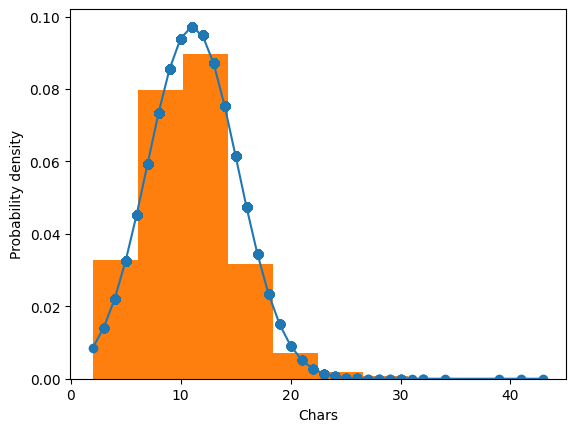

In [190]:
# get all the color names
names = df['name']
h = sorted(names.str.len().to_numpy())
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,density=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [192]:
#count how many colors have a name longer than 27 cha
names = df['name']
count = 0
for name in names:
    if len(name) > 25:
        count += 1
count

26

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4172 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4172 non-null   object
 1   red     4172 non-null   int64 
 2   green   4172 non-null   int64 
 3   blue    4172 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 163.0+ KB


In [194]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing
#from tensorflow.python.keras.preprocessing.text import Tokenizer

maxlen = 30
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [195]:
padded_names.shape

(4172, 30)

In [196]:
from keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)


In [197]:
one_hot_names.shape

(4172, 30, 48)

In [198]:
import numpy as np
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(df["red"]), norm(df["green"]), norm(df["blue"])])

In [200]:
normalized_values.shape

(4172, 3)

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, 48)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [149]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 256)        │       312,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526,339 (2.01 MB)

 Trainable params: 526,339 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [173]:
from sklearn.model_selection import train_test_split

# Assuming `one_hot_names` is your feature data and `normalized_values` are your labels
X_train, X_test, y_train, y_test = train_test_split(one_hot_names, normalized_values, test_size=0.1, random_state=42)

# Now you have 80% of the data in `X_train` and `y_train` for training
# and 20% in `X_test` and `y_test` for testing
one_hot_names

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [178]:
history = model.fit(X_train, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_split=0.1)  # You can still use a validation split within the training data


Epoch 1/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.9363 - loss: 0.0012 - val_acc: 0.8757 - val_loss: 0.0096
Epoch 2/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.9449 - loss: 9.8383e-04 - val_acc: 0.8919 - val_loss: 0.0090
Epoch 3/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.9547 - loss: 7.3296e-04 - val_acc: 0.8919 - val_loss: 0.0092
Epoch 4/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.9459 - loss: 6.1789e-04 - val_acc: 0.8973 - val_loss: 0.0089
Epoch 5/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9490 - loss: 6.4659e-04 - val_acc: 0.8919 - val_loss: 0.0088
Epoch 6/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - acc: 0.9463 - loss: 6.2824e-04 - val_acc: 0.8919 - val_loss: 0.0089
Epoch 7/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.9520 - loss: 5.3663e-04 - val_acc: 0.9027 - val_loss: 0.0087
Epoch 8/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - acc: 0.9503 - loss: 5.3892e-04 - val_acc: 0.8973 - val_loss: 0.0088
Epoch 9/60
53/53 ━━━━━━━━━━━━━━━━━━━

In [175]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", report)




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.8919 - loss: 0.0135
Test Loss: 0.012675249017775059
Test Accuracy: 0.8980582356452942
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Confusion Matrix:
 [[106   4   5]
 [  3  37   4]
 [  5   0  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       115
           1       0.90      0.84      0.87        44
           2       0.82      0.89      0.86        47

    accuracy                           0.90       206
   macro avg       0.89      0.89      0.88       206
weighted avg       0.90      0.90      0.90       206



In [202]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - acc: 0.5575 - loss: 0.0877 - val_acc: 0.6268 - val_loss: 0.0897
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.6989 - loss: 0.0744 - val_acc: 0.6340 - val_loss: 0.0832
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7185 - loss: 0.0692 - val_acc: 0.6244 - val_loss: 0.0839
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.7307 - loss: 0.0636 - val_acc: 0.6220 - val_loss: 0.0837
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7326 - loss: 0.0630 - val_acc: 0.6603 - val_loss: 0.0799
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7430 - loss: 0.0607 - val_acc: 0.6579 - val_loss: 0.0826
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - acc: 0.7613 - loss: 0.0580 - val_acc: 0.6555 - val_loss: 0.0802
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.7617 - loss: 0.0546 - val_acc: 0.6507 - val_loss: 0.0775
Epoch 9/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/

In [39]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [169]:
from keras.utils import to_categorical
# plot a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def scale(n):
    return int(n * 255) 

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=48)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
tensorflow orange, R,G,B: 252 150 22


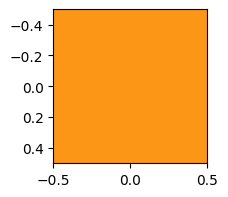

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
forest green, R,G,B: 22 106 32


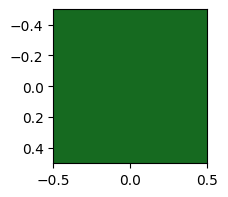

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
keras red, R,G,B: 193 10 48


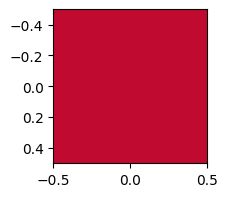

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
bull, R,G,B: 26 62 239


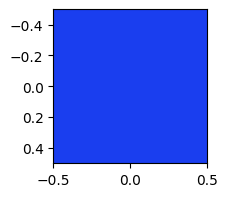

In [179]:
predict("tensorflow orange")
predict("forest green")
predict("keras red")
predict("bull")

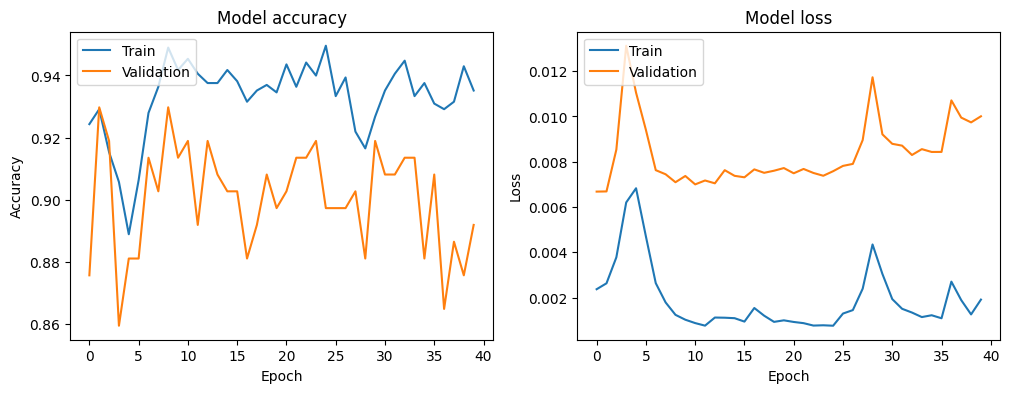

In [177]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [162]:
# show model metrics


AttributeError: 'Sequential' object has no attribute 'compile_metrics'

In [164]:
# The validation accuracy and loss are already included in the history
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_acc'][-1]

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


Validation Loss: 0.009824699722230434
Validation Accuracy: 0.9126213788986206


In [165]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions on the validation data
val_data = one_hot_names[int(len(one_hot_names)*0.9):]  # last 10% for validation
val_labels = normalized_values[int(len(normalized_values)*0.9):]

# Predict
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(val_labels, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Confusion Matrix:
 [[123   3  10]
 [  0  21   4]
 [  1   0  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95       136
           1       0.88      0.84      0.86        25
           2       0.76      0.98      0.85        45

    accuracy                           0.91       206
   macro avg       0.88      0.91      0.89       206
weighted avg       0.93      0.91      0.92       206

